In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

### 1. Definindo a função valor

In [4]:
acoes = {
    0: "Tomar insulina",
    1: "Comer",
    2: "Fazer exercício"
}

n_acoes = len(acoes)

estados = {
    0: "Glicose baixa",
    1: "Glicose média",
    2: "Glicose alta"
}

n_estados = len(estados)

### 2. Modelando o ambiente

In [5]:
class Diabetes:
    def __init__(self):
        self.state = random.randint(0, 2)
    
    def reset(self):
        self.state = random.randint(0, 2)
        return self.state
    
    def step(self, action):
        # Tomar insulina
        if action == 0:
            if self.state == 2:
                next_state = 1
            else:
                next_state = 0

        # Comer
        elif action == 1:
            if self.state == 0:
                next_state = 1
            else:
                next_state = 2

        # Fazer exercício
        elif action == 2:
            if self.state == 2:
                next_state = 1
            else:
                next_state = 0

        # Recompensa 
        if self.state == 1:
            reward = 20
        else: 
            reward = -5

        self.state = next_state
        return next_state, reward

### 3. Treinamento usando Q-Learning

In [6]:
env = Diabetes()

def q_learning(alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, episodes=2000):
    # Criando a Q-table
    q_table = np.zeros((n_estados, n_acoes))

    recompensas = []
    epsilon_values = []

    for episode in range(episodes):
        state = env.reset()
        total_recompensa = 0

        for step in range(100):
            # Escolher ação (epsilon-greedy)
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 2) 
            else:
                action = np.argmax(q_table[state])

            # Realizar ação
            next_state, recompensa = env.step(action)
            
            # Atualizar a Q-table
            td_target = recompensa + gamma * q_table[next_state, np.argmax(q_table[next_state])]
            td_error = td_target - q_table[state, action]
            q_table[state, action] += alpha * td_error
            
            # Calcular recompensa acumulada
            state = next_state
            total_recompensa += recompensa

        if (episode + 1) % 100 == 0:
            print(f"Episódio {episode + 1}/{episodes} - Recompensa Total: {total_recompensa} - Epsilon: {epsilon:.3f}")

        recompensas.append(total_recompensa)
        epsilon_values.append(epsilon)
        epsilon = max(0.01, epsilon * epsilon_decay)

    return q_table, recompensas, epsilon_values

q_table, recompensas, epsilon_values = q_learning()

Episódio 100/2000 - Recompensa Total: 600 - Epsilon: 0.370
Episódio 200/2000 - Recompensa Total: 750 - Epsilon: 0.135
Episódio 300/2000 - Recompensa Total: 750 - Epsilon: 0.050
Episódio 400/2000 - Recompensa Total: 750 - Epsilon: 0.018
Episódio 500/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 600/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 700/2000 - Recompensa Total: 725 - Epsilon: 0.010
Episódio 800/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 900/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1000/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1100/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1200/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1300/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1400/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1500/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1600/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1700/2000 - Recompensa Total: 725 - Epsi

### 4. Visualização dos resultados


Q-table final:
[[731.28140704 743.71859296 731.28140704]
 [756.28140704 756.28140704 756.28140704]
 [743.71859296 725.09708932 739.93430524]]


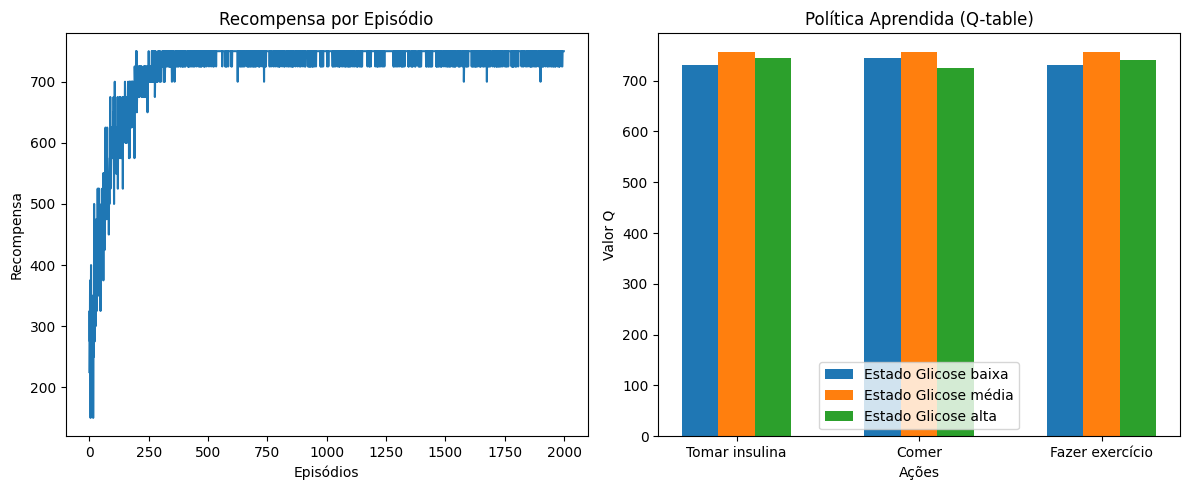

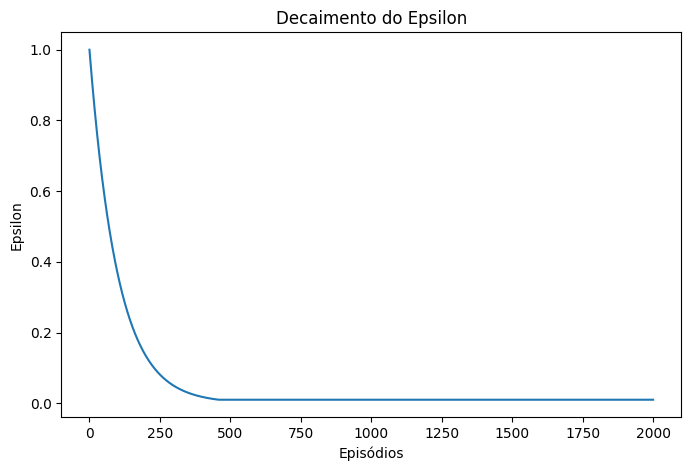

In [7]:
print("\nQ-table final:")
print(q_table)

# Plotar a recompensa ao longo dos episódios
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recompensas)
plt.title("Recompensa por Episódio")
plt.xlabel('Episódios')
plt.ylabel('Recompensa')

# Plotar a política aprendida
plt.subplot(1, 2, 2)
for state in range(n_estados):
    plt.bar(np.arange(n_acoes) + state * 0.2, q_table[state], width=0.2, label=f"Estado {estados[state]}")
plt.title("Política Aprendida (Q-table)")
plt.xlabel('Ações')
plt.ylabel('Valor Q')
plt.xticks(np.arange(n_acoes) + 0.2, [acoes[i] for i in range(n_acoes)])
plt.legend()

plt.tight_layout()
plt.show()

# Plotar a evolução do epsilon
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values)
plt.title("Decaimento do Epsilon")
plt.xlabel('Episódios')
plt.ylabel('Epsilon')
plt.show()

### 5. Interpretação dos resultados

A Q-table mostra os valores Q aprendidos para cada estado e ação. A política aprendida pode ser visualizada pelos valores mais altos em cada estado.

O gráfico de recompensa por episódio mostra a convergência do algoritmo, com as recompensas aumentando ao longo do tempo.

O decaimento do epsilon reflete a transição de uma política exploratória para uma política mais explorada, à medida que o algoritmo aprende.